## Evaluation of cea results 

In [2]:
import pandas as pd 
import os 

data_dict = {
    "QH_sys_MWhyr": {},
    "E_sys_MWhyr": {}
}
QH_dict = {}
base_path = 'CEA_model/Block0202023'
for year in [2020, 2021, 2022]:   
    path = os.path.join(base_path, str(year), 'outputs', 'data', 'demand', 'Total_demand.csv')
    df = pd.read_csv(path)
    data_dict["QH_sys_MWhyr"][year] = df["QH_sys_MWhyr"].sum()
    data_dict["E_sys_MWhyr"][year] = df["E_sys_MWhyr"].sum()



In [3]:
# Check variable naming: 
# https://city-energy-analyst.readthedocs.io/en/latest/output_methods.html#get-thermal-network-velocity-edges-file # 
# E_sys_MWhyr, End-use total electricity consumption
# QH_sys_MWhyr Total energy demand for heating
data_dict


{'QH_sys_MWhyr': {2020: 940.7660000000001,
  2021: 1067.1819999999998,
  2022: 985.0060000000001},
 'E_sys_MWhyr': {2020: 213.82100000000003,
  2021: 212.27399999999997,
  2022: 212.372}}

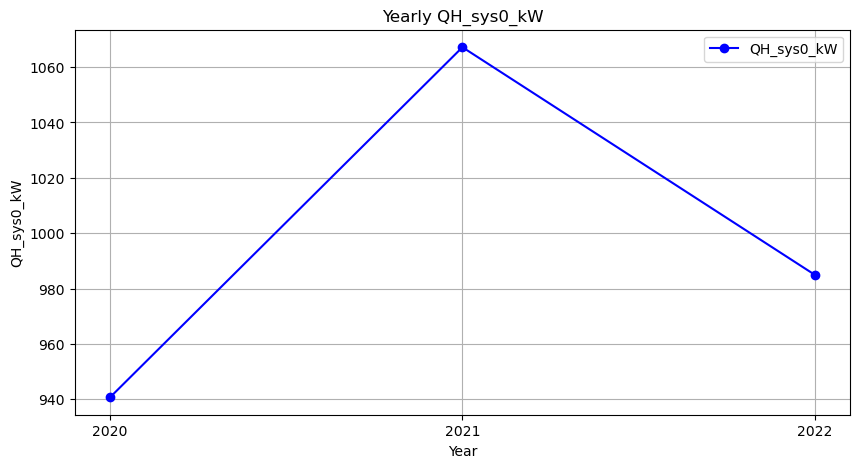

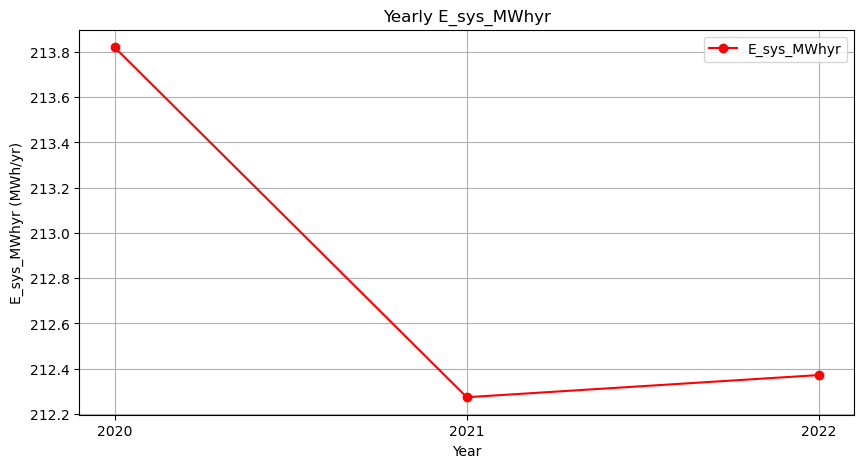

In [4]:
import matplotlib.pyplot as plt

# Provided data
# Extracting data for plotting
years = [2020, 2021, 2022]
qhsys0_kw_values = [data_dict['QH_sys_MWhyr'][year]for year in years]
esys_mwhyr_values = [data_dict['E_sys_MWhyr'][year] for year in years]

# Plotting QH_sys0_kW
plt.figure(figsize=(10, 5))
plt.plot(years, qhsys0_kw_values, marker='o', linestyle='-', color='blue', label='QH_sys0_kW')
plt.title('Yearly QH_sys0_kW')
plt.xlabel('Year')
plt.ylabel('QH_sys0_kW')
plt.xticks(years)
plt.grid(True)
plt.legend()

# Showing the first plot
plt.show()

# Plotting E_sys_MWhyr
plt.figure(figsize=(10, 5))
plt.plot(years, esys_mwhyr_values, marker='o', linestyle='-', color='red', label='E_sys_MWhyr')
plt.title('Yearly E_sys_MWhyr')
plt.xlabel('Year')
plt.ylabel('E_sys_MWhyr (MWh/yr)')
plt.xticks(years)
plt.grid(True)
plt.legend()

# Showing the second plot
plt.show()


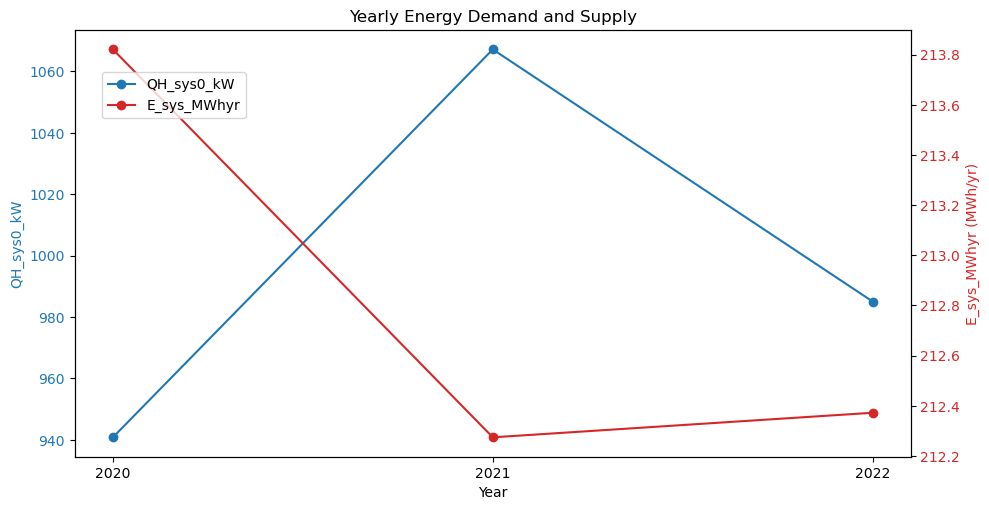

In [5]:
import matplotlib.pyplot as plt

# Provided data

# Extracting data for plotting
years = [2020, 2021, 2022]
qhsys0_kw_values = [data_dict['QH_sys_MWhyr'][year]for year in years]
esys_mwhyr_values = [data_dict['E_sys_MWhyr'][year] for year in years]

# Creating the plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting QH_sys0_kW with ax1
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('QH_sys0_kW', color=color)
ax1.plot(years, qhsys0_kw_values, marker='o', linestyle='-', color=color, label='QH_sys0_kW')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(years)

# Creating a second y-axis for E_sys_MWhyr
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('E_sys_MWhyr (MWh/yr)', color=color)  # we already handled the x-label with ax1
ax2.plot(years, esys_mwhyr_values, marker='o', linestyle='-', color=color, label='E_sys_MWhyr')
ax2.tick_params(axis='y', labelcolor=color)

# Final touches
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Yearly Energy Demand and Supply')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Showing the plot
plt.show()


In [6]:
# Get real data for comparison
# Block: 
elec_path = os.path.join('auxillary', 'Elec_Berlin_2020_2022.xls')
elec_data = pd.read_excel(elec_path)
elec_data

,Blocknummer,Stromverbrauch 2022 [MWh],Hinweis 2022,Stromverbrauch 2021 [MWh],Hinweis 2021,Stromverbrauch 2020 [MWh],Hinweis 2020
0,46079,813.544,-,840.854,-,1076.908,-
1,24177,672.709,-,686.236,-,757.085,-
2,177079,10.313,-,-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...
3,39616,106.652,-,116.708,-,111.691,-
4,67643,826.085,-,841.998,-,771.151,-
...,...,...,...,...,...,...,...
16385,78228,100.213,-,101.961,-,98.007,-
16386,74501,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar
16387,187017,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar
16388,74128,375.105,-,379.125,-,355.516,-


In [7]:
filtered_df = elec_data[elec_data["Blocknummer"] == 20023]

In [8]:
elec_mwhyr = {
    2020: filtered_df["Stromverbrauch 2020 [MWh]"].item(),
    2021 : filtered_df["Stromverbrauch 2021 [MWh]"].item(),
    2022: filtered_df["Stromverbrauch 2022 [MWh]"].item()
}
elec_mwhyr

{2020: 182.027, 2021: 180.491, 2022: 173.854}

In [9]:
# Get real data for comparison
# Block: 
gas_path = os.path.join('auxillary', 'Gas_Berlin_2020_2022.xls')
gas_data = pd.read_excel(gas_path)
gas_data



,Blocknummer,Gasverbrauch 2022 [MWh],Hinweis 2022,Gasverbrauch 2021 [MWh],Hinweis 2021,Gasverbrauch 2020 [MWh],Hinweis 2020
0,46079,1227.315,-,1550.742,-,1385.74,-
1,24177,-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...
2,177079,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar
3,39616,188.53,-,235.887,-,213.771,-
4,67643,2832.118,-,3333.315,-,2990.835,-
...,...,...,...,...,...,...,...
16385,78228,-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...,-,Der Verbrauch wird aus Datenschutzgründen nich...
16386,74501,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar
16387,187017,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar
16388,74128,991.891,-,1052.222,-,937.367,-


In [10]:
gas_data_filtered = gas_data[gas_data["Blocknummer"] == 20023]

In [11]:
gas_mwhyr = {
    2020: gas_data_filtered["Gasverbrauch 2020 [MWh]"].item(),
    2021 : gas_data_filtered["Gasverbrauch 2021 [MWh]"].item(),
    2022: gas_data_filtered["Gasverbrauch 2022 [MWh]"].item()
}

In [12]:
# Get real data for comparison
# Block: 
dh_path = os.path.join('auxillary', 'DH_Berlin_2020_2022.xls')
dh_data = pd.read_excel(dh_path)


In [13]:
dh_data 

,Blocknummer,Fernwärmeverbrauch 2022 [MWh],Fernwärmeverbrauch 2021 [MWh],Fernwärmeverbrauch 2020 [MWh]
0,1001,-,-,-
1,1002,-,-,-
2,1007,2568.032,2786.803,2684.242
3,1010,-,-,-
4,1012,1305.403,1432.731,1444.354
...,...,...,...,...
16385,195634,-,-,-
16386,195635,-,-,-
16387,195901,-,-,-
16388,195902,-,-,-


In [14]:
dh_data_filtered = dh_data[dh_data["Blocknummer"] == 20023]
dh_data_filtered = dh_data_filtered.replace('-', 0)

In [15]:
dh_mwhyr = {
    2020: dh_data_filtered["Fernwärmeverbrauch 2020 [MWh]"].item(),
    2021 : dh_data_filtered["Fernwärmeverbrauch 2021 [MWh]"].fillna(0).item(),
    2022: dh_data_filtered["Fernwärmeverbrauch 2022 [MWh]"].fillna(0).item()
}
dh_mwhyr

{2020: 851.346, 2021: 0, 2022: 0}

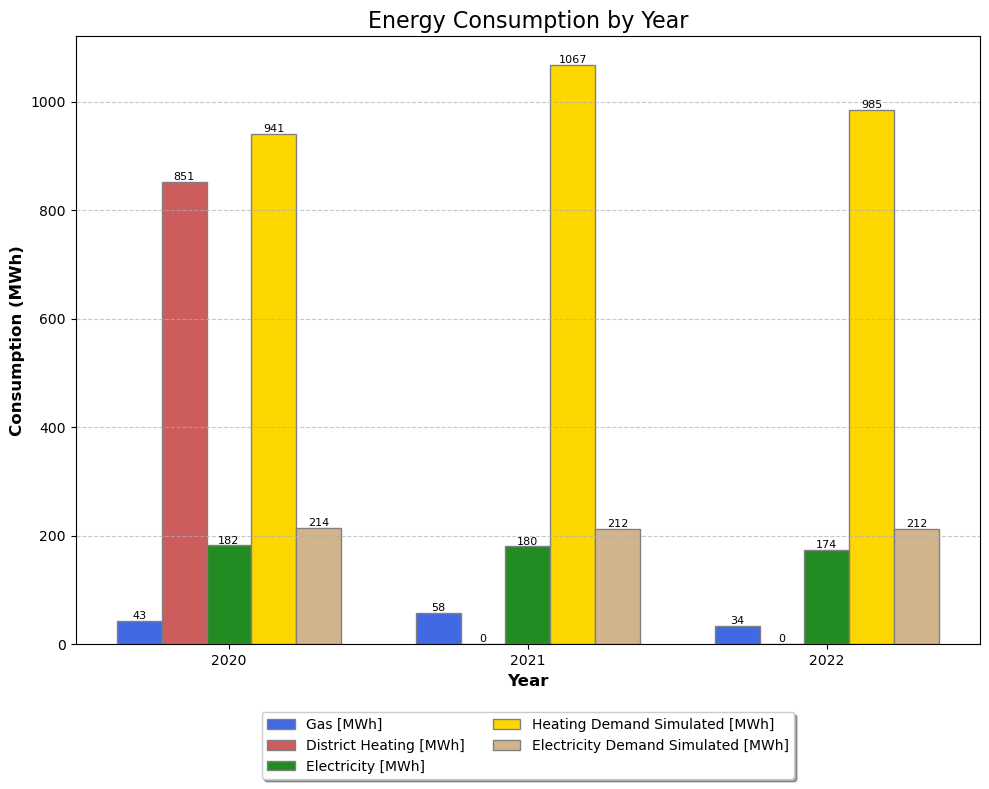

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assume the dictionaries 'gas_mwhyr', 'dh_mwhyr', 'elec_mwhyr' and 'data_dict' are already defined as in the original scenario.

# Years for the x-axis
years = list(gas_mwhyr.keys())

# Values for the y-axis
gas_values = list(gas_mwhyr.values())
dh_values = list(dh_mwhyr.values())
elec_values = list(elec_mwhyr.values())
sim_heating = list(data_dict["QH_sys_MWhyr"].values())
sim_elec = list(data_dict["E_sys_MWhyr"].values())

# Set the width of the bars
bar_width = 0.15  # Reduced width to introduce space between bars

# Set the position of the bars on the x-axis
r1 = np.arange(len(gas_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Make the plot
plt.figure(figsize=(10, 8))  # Increased figure size
plt.bar(r1, gas_values, color='royalblue', width=bar_width, edgecolor='grey', label='Gas [MWh]')
plt.bar(r2, dh_values, color='indianred', width=bar_width, edgecolor='grey', label='District Heating [MWh]')
plt.bar(r3, elec_values, color='forestgreen', width=bar_width, edgecolor='grey', label='Electricity [MWh]')
plt.bar(r4, sim_heating, color='gold', width=bar_width, edgecolor='grey', label='Heating Demand Simulated [MWh]')
plt.bar(r5, sim_elec, color='tan', width=bar_width, edgecolor='grey', label='Electricity Demand Simulated [MWh]')

# Add labels to the x-axis and y-axis
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Consumption (MWh)', fontweight='bold', fontsize=12)
plt.xticks([r + bar_width*2 for r in range(len(gas_values))], years, fontsize=10)

# Create legend & Show graphic
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
plt.title('Energy Consumption by Year', fontsize=16)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optionally, add value labels on top of each bar
for i in range(len(r1)):
    plt.text(r1[i], gas_values[i], str(round(gas_values[i])), ha='center', va='bottom', fontsize=8)
    plt.text(r2[i], dh_values[i], str(round(dh_values[i])), ha='center', va='bottom', fontsize=8)
    plt.text(r3[i], elec_values[i], str(round(elec_values[i])), ha='center', va='bottom', fontsize=8)
    plt.text(r4[i], sim_heating[i], str(round(sim_heating[i])), ha='center', va='bottom', fontsize=8)
    plt.text(r5[i], sim_elec[i], str(round(sim_elec[i])), ha='center', va='bottom', fontsize=8)

# Show graphic
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()


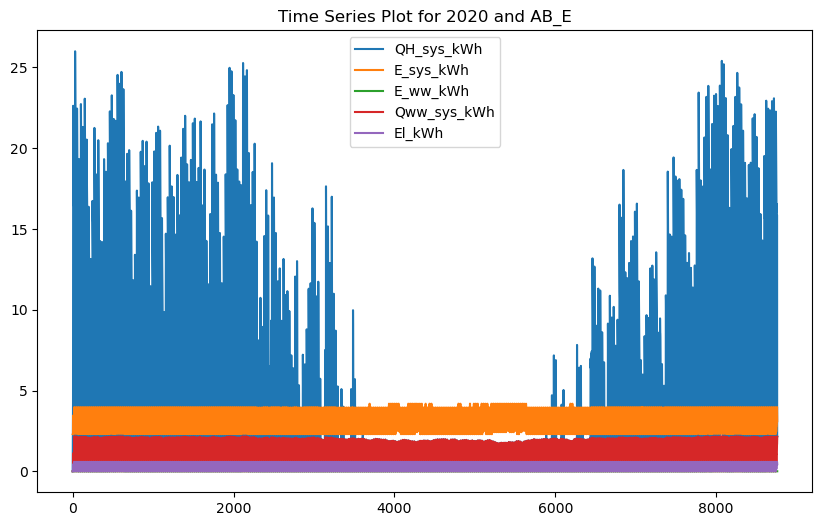

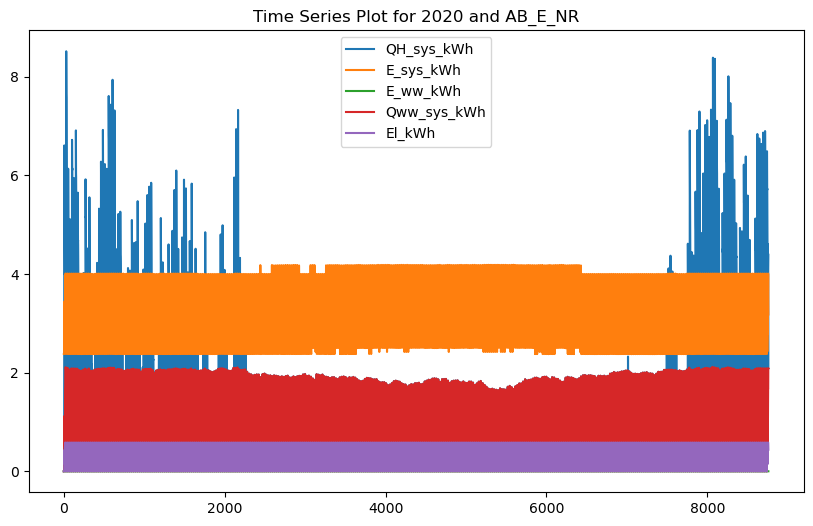

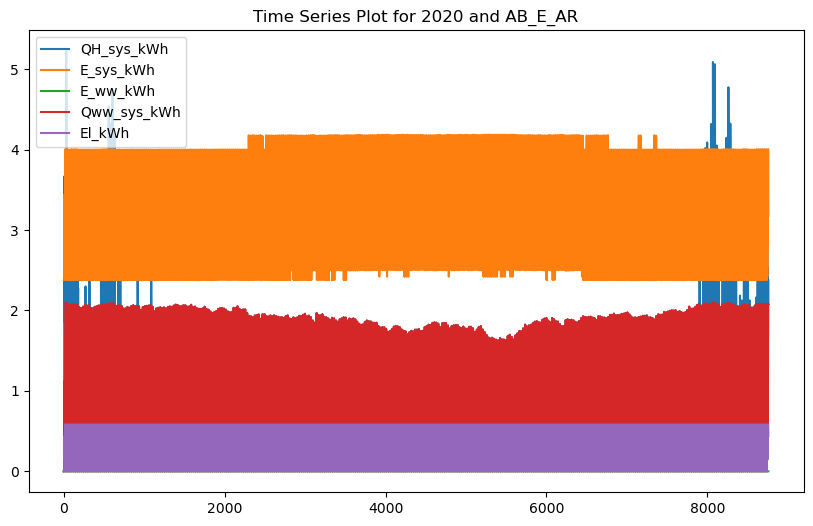

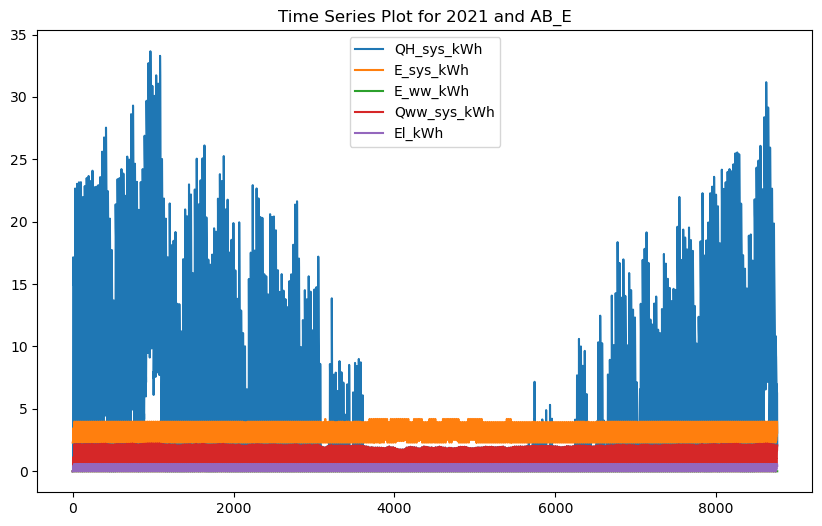

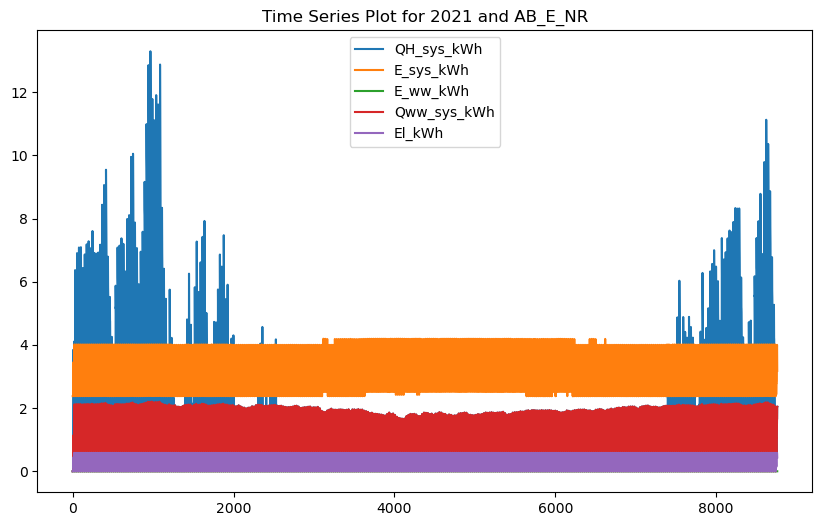

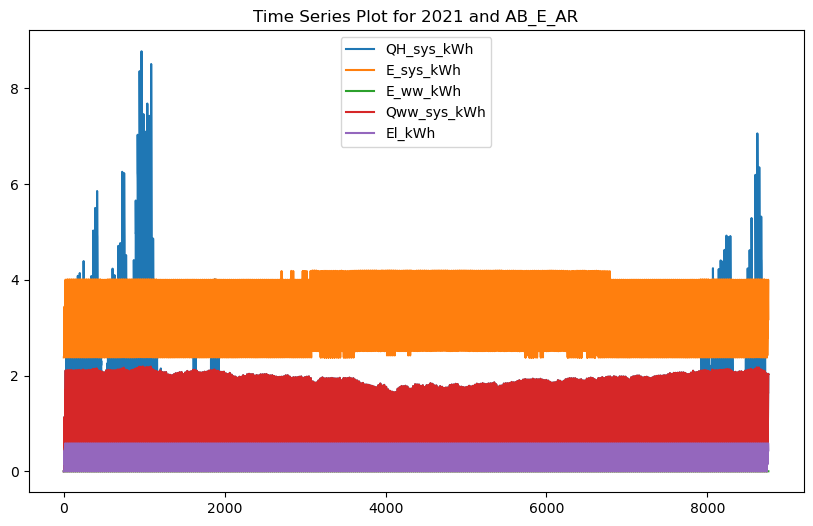

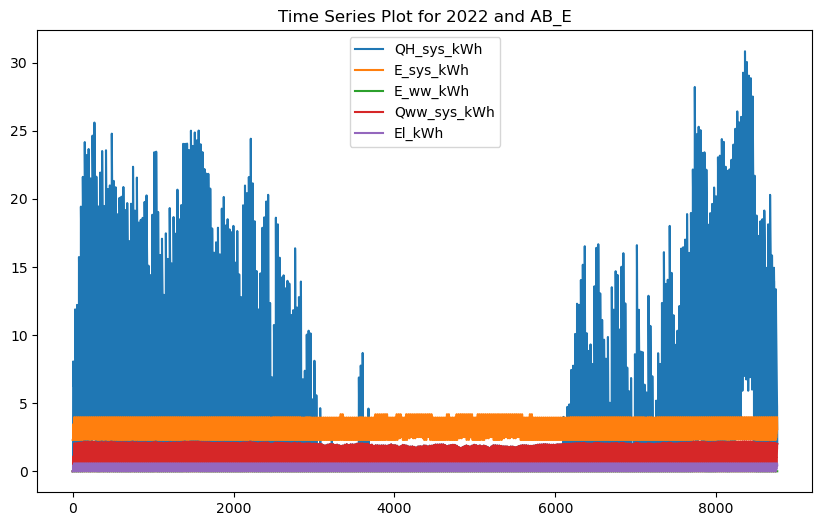

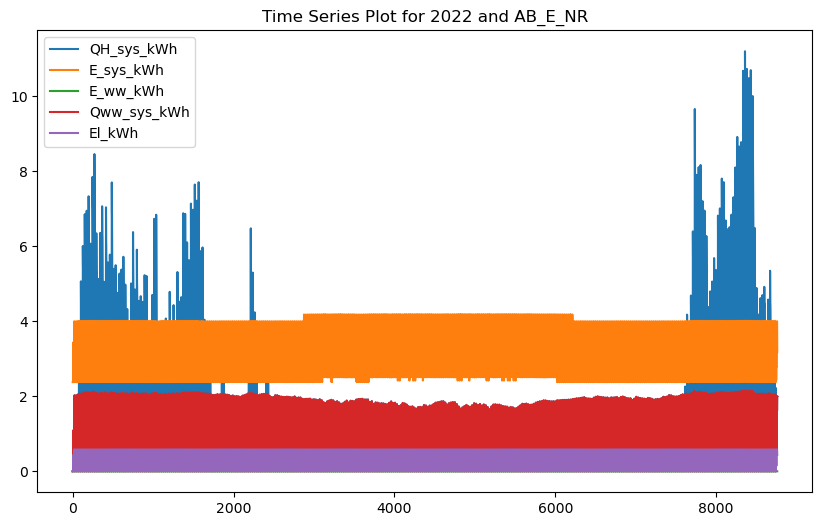

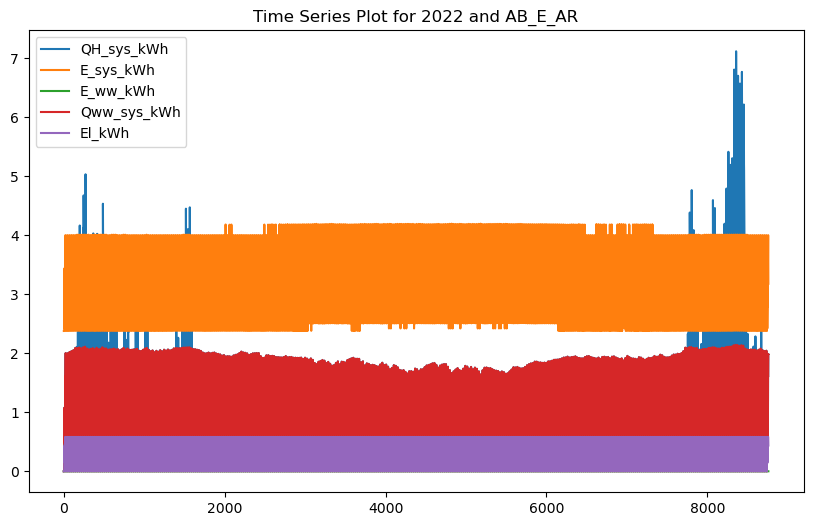

In [46]:
# Detailed Analysis of a year for the buildings 
for year in ["2020", "2021", "2022"]:
    for refurb in ["AB_E", "AB_E_NR", "AB_E_AR"]:
        paths = []
        summed_df = pd.DataFrame
        for building in ["B1000.csv", "B1001.csv", "B1002.csv", "B1003.csv", "B1004.csv", "B1005.csv"]: 
            path = os.path.join(base_path, f"{year}_{refurb}", 'outputs', 'data', 'demand', f"{building}")
            df = pd.read_csv(path)
        # If summed_df is empty, just assign df to it; otherwise, add df to summed_df
        if summed_df.empty:
            summed_df = df
        else:
            summed_df = summed_df.add(df, fill_value=0)
        summed_df.head()
        summed_df.set_index("DATE")
        summed_df.plot(y=['QH_sys_kWh', 'E_sys_kWh', 'E_ww_kWh', 'Qww_sys_kWh', 'El_kWh'], figsize=(10, 6), title=f'Time Series Plot for {year} and {refurb}')

In [24]:
# Basic time series plot
print(list(df.columns))


['DATE', 'Name', 'people', 'x_int', 'PV_kWh', 'GRID_kWh', 'GRID_a_kWh', 'GRID_l_kWh', 'GRID_v_kWh', 'GRID_ve_kWh', 'GRID_data_kWh', 'GRID_pro_kWh', 'GRID_aux_kWh', 'GRID_ww_kWh', 'GRID_hs_kWh', 'GRID_cs_kWh', 'GRID_cdata_kWh', 'GRID_cre_kWh', 'E_sys_kWh', 'Eal_kWh', 'Ea_kWh', 'El_kWh', 'Ev_kWh', 'Eve_kWh', 'Edata_kWh', 'Epro_kWh', 'Eaux_kWh', 'E_ww_kWh', 'E_hs_kWh', 'E_cs_kWh', 'E_cre_kWh', 'E_cdata_kWh', 'Qhs_sen_shu_kWh', 'Qhs_sen_ahu_kWh', 'Qhs_lat_ahu_kWh', 'Qhs_sen_aru_kWh', 'Qhs_lat_aru_kWh', 'Qhs_sen_sys_kWh', 'Qhs_lat_sys_kWh', 'Qhs_em_ls_kWh', 'Qhs_dis_ls_kWh', 'Qhs_sys_shu_kWh', 'Qhs_sys_ahu_kWh', 'Qhs_sys_aru_kWh', 'Qcs_sys_scu_kWh', 'Qcs_sys_ahu_kWh', 'Qcs_sys_aru_kWh', 'DH_hs_kWh', 'Qhs_sys_kWh', 'Qhs_kWh', 'DH_ww_kWh', 'Qww_sys_kWh', 'Qww_kWh', 'DC_cs_kWh', 'Qcs_sys_kWh', 'Qcs_kWh', 'DC_cre_kWh', 'Qcre_sys_kWh', 'Qcre_kWh', 'DC_cdata_kWh', 'Qcdata_sys_kWh', 'Qcdata_kWh', 'NG_hs_kWh', 'COAL_hs_kWh', 'OIL_hs_kWh', 'WOOD_hs_kWh', 'SOLAR_hs_kWh', 'NG_ww_kWh', 'COAL_ww_kWh', '